### Regression Exercise 
# Moneyball The NBA

##### Import Our Libraries

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt


# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse
    

### Also I am going to put regression in the mix as well

In [163]:
# from sklearn.feature_selection import r_regression

##### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/NBA_test.csv and data/NBA_train.csv`

In [2]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/NBA_test.csv')
df.head()

# DISPLAY THE FIRST 5 ROWS

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,2013,Atlanta Hawks,1,44,8032,7999,3084,6644,2378,4743,706,1901,1158,1619,758,2593,2007,664,369,1219
1,2013,Brooklyn Nets,1,49,7944,7798,2942,6544,2314,4784,628,1760,1432,1958,1047,2460,1668,599,391,1206
2,2013,Charlotte Bobcats,0,21,7661,8418,2823,6649,2354,5250,469,1399,1546,2060,917,2389,1587,591,479,1153
3,2013,Chicago Bulls,1,45,7641,7615,2926,6698,2480,5433,446,1265,1343,1738,1026,2514,1886,588,417,1171
4,2013,Cleveland Cavaliers,0,24,7913,8297,2993,6901,2446,5320,547,1581,1380,1826,1004,2359,1694,647,334,1149


#### Inspect our data using `df.describe()` function.

In [3]:
# Inspect our data using `df.describe()` function.
df.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2013.0,0.500000,40.678571,8061.821429,8072.821429,3051.285714,6736.607143,2460.214286,5090.964286,591.071429,1645.642857,1368.178571,1818.571429,919.964286,2532.678571,1818.821429,640.392857,419.428571,1191.392857
std,0.0,0.509175,13.078265,338.940840,282.198256,108.952201,170.394605,133.085703,347.353858,118.700347,284.668776,167.057332,219.899881,107.620899,120.902487,118.686345,67.871523,73.159100,67.380258
min,2013.0,0.000000,20.000000,7640.000000,7319.000000,2823.000000,6348.000000,2105.000000,4318.000000,382.000000,1107.000000,1004.000000,1359.000000,666.000000,2359.000000,1579.000000,520.000000,294.000000,988.000000
25%,2013.0,0.000000,29.000000,7763.000000,7898.500000,2975.250000,6643.000000,2374.750000,4844.750000,511.500000,1469.250000,1297.750000,1695.000000,882.250000,2451.750000,1736.750000,590.250000,366.500000,1152.000000
50%,2013.0,0.500000,42.000000,8013.500000,8068.500000,3052.500000,6695.500000,2474.000000,5203.000000,584.500000,1608.000000,1357.000000,1786.000000,927.500000,2482.500000,1840.500000,653.500000,408.500000,1201.000000
75%,2013.0,1.000000,50.250000,8293.750000,8288.000000,3126.500000,6892.750000,2539.500000,5335.500000,659.250000,1761.000000,1439.750000,1905.500000,989.500000,2622.000000,1887.000000,686.250000,448.000000,1233.000000
max,2013.0,1.000000,66.000000,8704.000000,8619.000000,3339.000000,7197.000000,2818.000000,5572.000000,891.000000,2371.000000,1819.000000,2289.000000,1092.000000,2801.000000,2058.000000,784.000000,624.000000,1348.000000


#### Check for Nulls.

In [4]:
# Check for Nulls.
df.isnull().value_counts()


SeasonEnd  Team   Playoffs  W      PTS    oppPTS  FG     FGA    2P     2PA    3P     3PA    FT     FTA    ORB    DRB    AST    STL    BLK    TOV  
False      False  False     False  False  False   False  False  False  False  False  False  False  False  False  False  False  False  False  False    28
Name: count, dtype: int64

#### Check for Duplicates

In [5]:
# Check for Duplicates
any(df.duplicated())

False

#### Build a function that will do this for you for any data frame you pass into it.

In [6]:
def inspect_dataframe(input_df):
    if not all(input_df.duplicated()):
           return 'No duplicates'
    return f"There is/are {input_df.duplicated().sum()} duplicate(s)"
inspect_dataframe(df)




'No duplicates'

#### Get a sense of how many wins it will take to make the playoffs. 
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

<Axes: xlabel='W', ylabel='Team'>

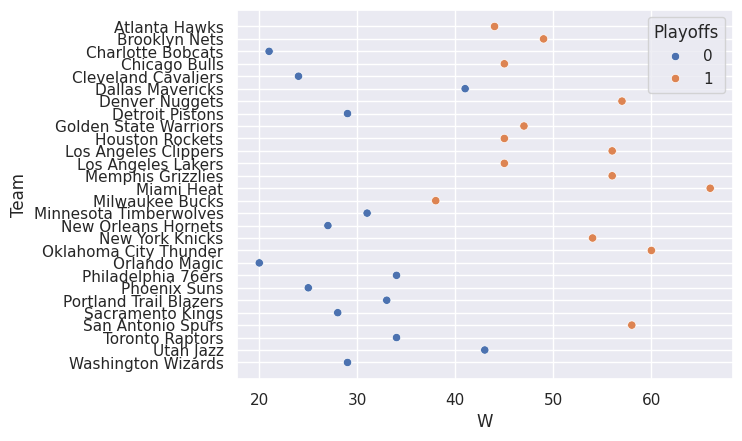

In [7]:
sns.set_theme()
sns.scatterplot(df,x=df.W,y=df.Team,hue=df.Playoffs)

#### Take a rough estimate, and now use that moving forward.  

In [8]:
WINS_NEED_TO_MAKE_PLAYOFFS = 50 

---

# Now do moneyball but for the NBA. 

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collorbration and learning from eachother.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

In [9]:
NBA_test = pd.read_csv('data/NBA_test.csv')
NBA_train = pd.read_csv('data/NBA_train.csv')

---
<h1><span style="color:yellow;">My own work</span></h1>

# Moneyball time, but with basketball instead of baseball 
#### Oh yeah!

### First I am going to look at the data just to get the feel of what I have you know?

In [10]:
#First I am going to combinge the different data frames into one DataFrame so I can do a quick analysis of the total data that I am working with 

NBA_total= pd.concat([NBA_test, NBA_train], axis=0)
NBA_total

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,2013,Atlanta Hawks,1,44,8032,7999,3084,6644,2378,4743,706,1901,1158,1619,758,2593,2007,664,369,1219
1,2013,Brooklyn Nets,1,49,7944,7798,2942,6544,2314,4784,628,1760,1432,1958,1047,2460,1668,599,391,1206
2,2013,Charlotte Bobcats,0,21,7661,8418,2823,6649,2354,5250,469,1399,1546,2060,917,2389,1587,591,479,1153
3,2013,Chicago Bulls,1,45,7641,7615,2926,6698,2480,5433,446,1265,1343,1738,1026,2514,1886,588,417,1171
4,2013,Cleveland Cavaliers,0,24,7913,8297,2993,6901,2446,5320,547,1581,1380,1826,1004,2359,1694,647,334,1149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,2011,Sacramento Kings,0,24,8151,8589,3134,6979,2706,5702,428,1277,1455,1981,1071,2526,1675,608,391,1324
831,2011,San Antonio Spurs,1,61,8502,8034,3148,6628,2463,4901,685,1727,1521,1984,829,2603,1836,602,372,1101
832,2011,Toronto Raptors,0,22,8124,8639,3144,6755,2799,5664,345,1091,1491,1976,963,2343,1795,581,350,1206
833,2011,Utah Jazz,0,39,8153,8303,3064,6590,2629,5334,435,1256,1590,2061,898,2338,1921,629,484,1175


## Let us check out the head and the tail

In [11]:
NBA_total.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,2013,Atlanta Hawks,1,44,8032,7999,3084,6644,2378,4743,706,1901,1158,1619,758,2593,2007,664,369,1219
1,2013,Brooklyn Nets,1,49,7944,7798,2942,6544,2314,4784,628,1760,1432,1958,1047,2460,1668,599,391,1206
2,2013,Charlotte Bobcats,0,21,7661,8418,2823,6649,2354,5250,469,1399,1546,2060,917,2389,1587,591,479,1153
3,2013,Chicago Bulls,1,45,7641,7615,2926,6698,2480,5433,446,1265,1343,1738,1026,2514,1886,588,417,1171
4,2013,Cleveland Cavaliers,0,24,7913,8297,2993,6901,2446,5320,547,1581,1380,1826,1004,2359,1694,647,334,1149


In [12]:
NBA_total.tail()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
830,2011,Sacramento Kings,0,24,8151,8589,3134,6979,2706,5702,428,1277,1455,1981,1071,2526,1675,608,391,1324
831,2011,San Antonio Spurs,1,61,8502,8034,3148,6628,2463,4901,685,1727,1521,1984,829,2603,1836,602,372,1101
832,2011,Toronto Raptors,0,22,8124,8639,3144,6755,2799,5664,345,1091,1491,1976,963,2343,1795,581,350,1206
833,2011,Utah Jazz,0,39,8153,8303,3064,6590,2629,5334,435,1256,1590,2061,898,2338,1921,629,484,1175
834,2011,Washington Wizards,0,23,7977,8584,3048,6888,2656,5706,392,1182,1489,1999,1013,2374,1592,665,502,1258


## Now check if we have duplicate values

In [13]:
any(NBA_total.duplicated())

False

## Nice!
## Throw in a .describe() and .info() (because I forgot and  I am too lazy to add more cells at the top)

In [14]:
print(NBA_total.describe())
print('\n','-' * 80,"\n")
print(NBA_total.info())

         SeasonEnd    Playoffs           W           PTS        oppPTS  \
count   863.000000  863.000000  863.000000    863.000000    863.000000   
mean   1996.860950    0.572422   40.989571   8360.232908   8360.589803   
std       9.561215    0.495014   12.744268    577.260038    582.468157   
min    1980.000000    0.000000   11.000000   6901.000000   6909.000000   
25%    1989.000000    0.000000   31.000000   7930.500000   7931.000000   
50%    1997.000000    1.000000   42.000000   8296.000000   8342.000000   
75%    2005.000000    1.000000   50.500000   8769.000000   8756.000000   
max    2013.000000    1.000000   72.000000  10371.000000  10723.000000   

                FG          FGA           2P          2PA          3P  \
count   863.000000   863.000000   863.000000   863.000000  863.000000   
mean   3195.530707  6868.882966  2867.661645  5928.363847  327.869061   
std     284.366791   396.352970   445.721188   833.547771  203.350201   
min    2565.000000  5972.000000  1981.000

## Wow, better that I thought ...
## But just to make sure

In [15]:
NBA_total.isnull().sum()

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

## Beautiful

## So the question is now, what factor(s) influence some factor.
## In other words, how much wins does a team need to make it to the playoffs

In [17]:
NBA_total.columns

Index(['SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV'],
      dtype='object')

### To get an idea of what it takes to win, let us plot a graph that shows the relationship between the teams that made it to the playoffs an the teams that did not based on the amount of wins

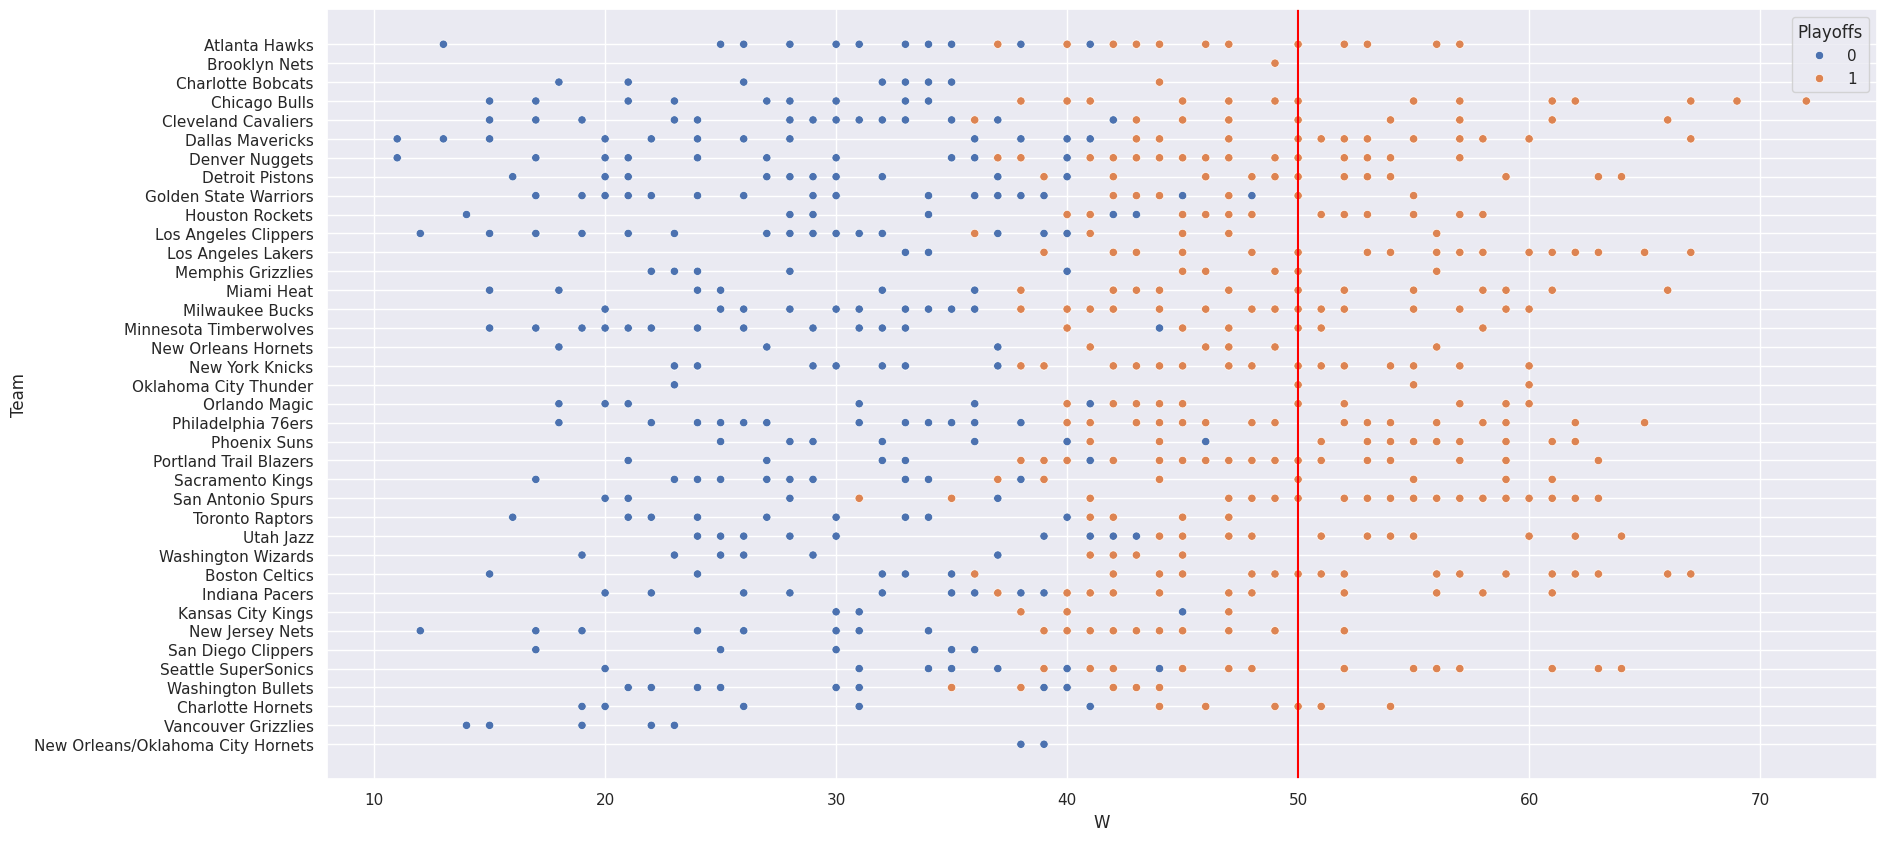

In [38]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(NBA_total,x="W",y="Team",hue="Playoffs")
ax.axvline(x=50,color="red")

#### Using my gut feeling, I am saying on average a team needs about say 50 wins to make it to the playoffs

In [58]:
NBA_total.sort_values(by="SeasonEnd")#.groupby(["SeasonEnd","Team","Playoffs"]).W.count()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
5,1980,Detroit Pistons,0,16,8933,9609,3643,7596,3586,7377,57,219,1590,2149,1226,2415,1950,783,562,1742
17,1980,San Antonio Spurs,1,41,9788,9819,3856,7738,3804,7532,52,206,2024,2528,1153,2515,2326,771,333,1589
16,1980,Portland Trail Blazers,1,38,8402,8469,3408,7167,3382,7035,26,132,1560,2100,1295,2408,1898,708,472,1552
15,1980,Phoenix Suns,1,55,9114,8819,3570,7235,3502,6955,68,280,1906,2466,1071,2458,2283,908,344,1629
14,1980,Philadelphia 76ers,1,59,8949,8603,3523,7156,3496,7031,27,125,1876,2431,1187,2635,2226,792,652,1708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,2013,San Antonio Spurs,1,58,8448,7923,3210,6675,2547,4911,663,1764,1365,1725,666,2721,2058,695,446,1206
25,2013,Toronto Raptors,0,34,7971,8092,2979,6685,2408,5020,571,1665,1442,1831,871,2426,1765,595,392,1124
26,2013,Utah Jazz,0,43,8038,8045,3046,6710,2539,5325,507,1385,1439,1883,989,2457,1859,690,515,1210
14,2013,Milwaukee Bucks,1,38,8108,8231,3128,7197,2527,5527,601,1670,1251,1700,1068,2537,1876,685,550,1156


In [62]:
grouped = NBA_total.groupby("SeasonEnd").W.sum()

### Let's see how the amout players that made the playoffs change with time 

In [65]:
grouped.index

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013],
      dtype='int64', name='SeasonEnd')

<Axes: xlabel='SeasonEnd'>

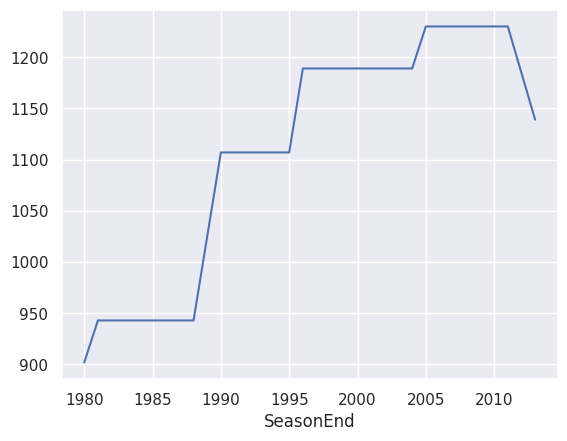

In [75]:
sns.lineplot(x=grouped.index,y=grouped.values)

In [76]:
NBA_total.columns

Index(['SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV'],
      dtype='object')

### From chatgpt
In the context of basketball statistics, the terms you provided have the following meanings:

1. 'SeasonEnd': The end of the basketball season to which the statistics correspond.

2. 'Team': The name or identifier of a basketball team. This column typically contains the team name or code.

3. 'Playoffs': A binary indicator (usually 0 or 1) that specifies whether the team made it to the playoffs (1) or not (0) during the season.

4. 'W': The number of games the team won during the season.

5. 'PTS': Total points scored by the team over the course of the season.

6. 'oppPTS': Total points scored by the opponent teams against the team during the season.

7. 'FG': Total field goals made by the team.

8. 'FGA': Total field goals attempted by the team.

9. '2P': Total two-point field goals made by the team.

10. '2PA': Total two-point field goals attempted by the team.

11. '3P': Total three-point field goals made by the team.

12. '3PA': Total three-point field goals attempted by the team.

13. 'FT': Total free throws made by the team.

14. 'FTA': Total free throws attempted by the team.

15. 'ORB': Total offensive rebounds grabbed by the team.

16. 'DRB': Total defensive rebounds grabbed by the team.

17. 'AST': Total assists made by the team.

18. 'STL': Total steals by the team.

19. 'BLK': Total blocks by the team.

20. 'TOV': Total turnovers committed by the team.

These statistics are commonly used in basketball to evaluate the performance of teams during a season. They provide insights into a team's offensive and defensive capabilities, as well as their overall success in terms of wins and losses. The specific meanings and interpretations of these terms can vary slightly depending on the context and the source of the data.[jj

### Okay so how exactly do we, win? 
### Is it when a team gains more points that they give? 
### I am going to check which teams are in the green for points gained.

In [77]:
NBA_total["points_diff"] = NBA_total["PTS"] - NBA_total["oppPTS"]

In [80]:
NBA_total.sort_values(by="points_diff",ascending=False)

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,points_diff
396,1996,Chicago Bulls,1,72,8625,7621,3293,6892,2749,5543,...,1349,1495,2004,1247,2411,2033,745,345,1175,1004
425,1997,Chicago Bulls,1,69,8458,7572,3277,6923,2754,5520,...,1403,1381,1848,1235,2461,2142,716,332,1109,886
288,1992,Chicago Bulls,1,67,9011,8155,3643,7168,3505,6714,...,454,1587,2132,1173,2439,2279,672,480,1088,856
716,2008,Boston Celtics,1,66,8245,7404,2986,6286,2390,4722,...,1564,1677,2176,830,2615,1833,696,379,1246,841
138,1986,Boston Celtics,1,67,9359,8587,3718,7312,3580,6919,...,393,1785,2248,1054,2753,2387,641,511,1360,772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1987,Los Angeles Clippers,0,12,8566,9503,3311,7332,3233,6984,...,348,1866,2515,1231,2137,1971,751,432,1493,-937
491,2000,Los Angeles Clippers,0,15,7546,8491,2877,6757,2448,5490,...,1267,1363,1826,955,2377,1479,578,494,1325,-945
76,1983,Houston Rockets,0,14,8145,9096,3338,7446,3271,7175,...,271,1402,1934,1206,2260,1931,646,422,1571,-951
457,1998,Denver Nuggets,0,11,7300,8266,2677,6412,2389,5519,...,893,1658,2147,1040,2157,1547,664,393,1311,-966


In [83]:
sorted(NBA_total.SeasonEnd.unique())

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2013]

In [104]:
#highest = NBA_total.groupby(["SeasonEnd"])

In [119]:
#highest[highest["points_diff"] == highest["points_diff"].max()]
#<--! Okay, so I am trying to isolate the team that had the most amount of points, but I am having trouble doing that. Thinking about asking someone bettter than me

<Axes: xlabel='SeasonEnd'>

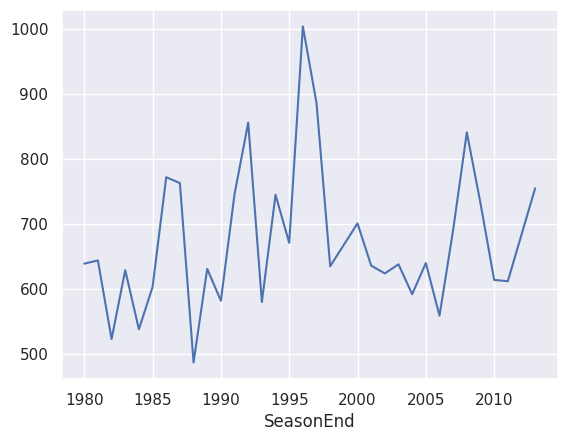

In [90]:
sns.lineplot(x=highest.index, y=highest.values)

In [120]:
NBA_total.columns

Index(['SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV', 'points_diff'],
      dtype='object')

In [129]:
NBA_total.rename(columns = {"points_diff":"PTSdiff"},inplace=True)

#### Now I am going to compare the points diff to the chance of winning a game 

<Axes: xlabel='PTSdiff', ylabel='W'>

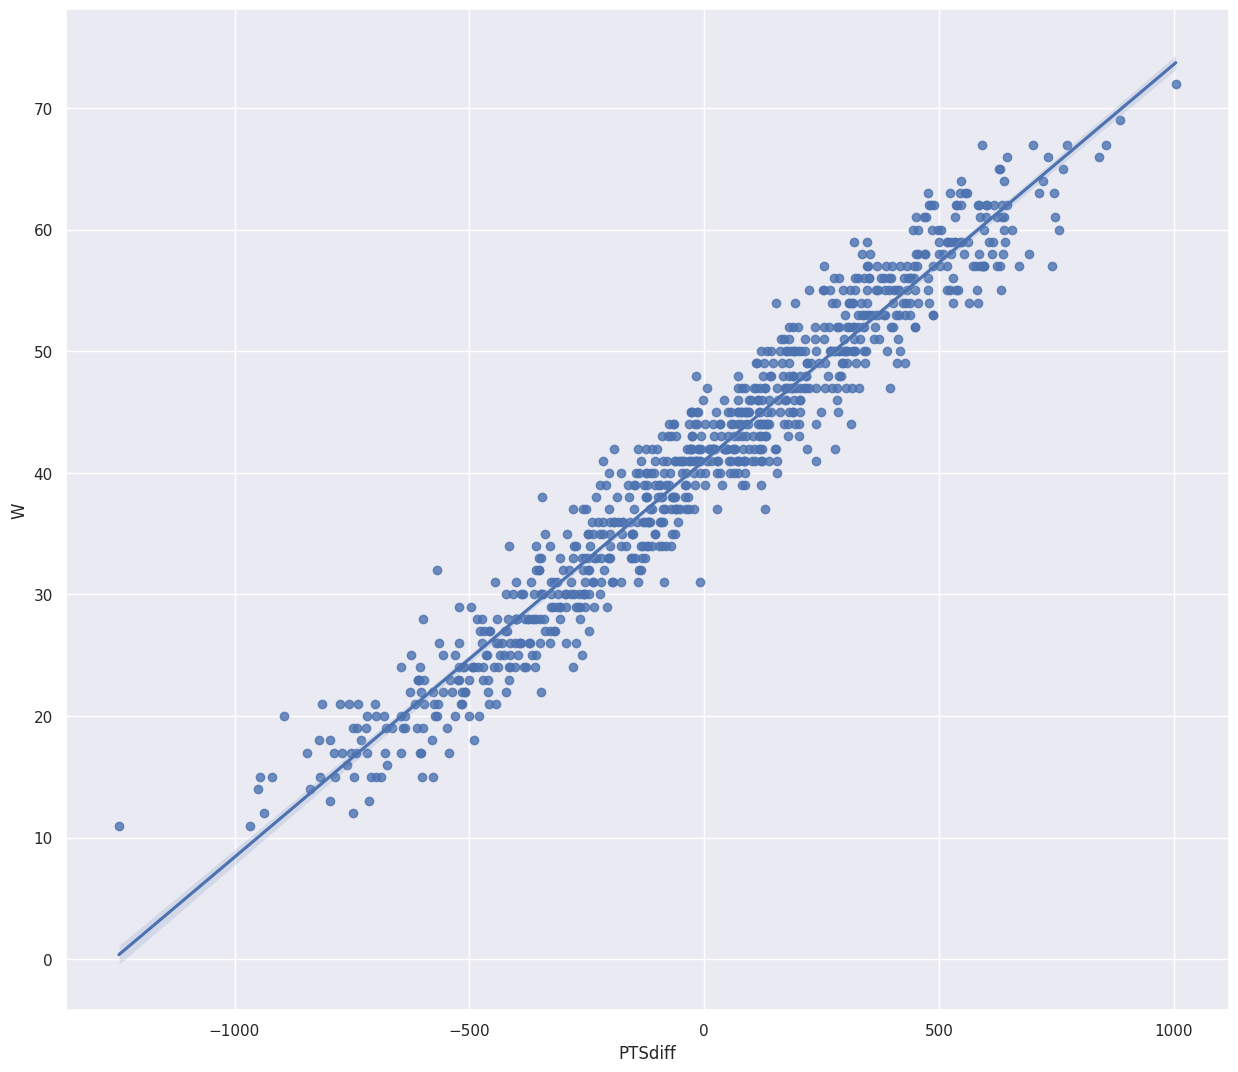

In [135]:
NBA_total.columns
plt.figure(figsize=(15,13))
sns.regplot(NBA_total,x="PTSdiff",y="W")

#### Wow, that looks very linear! Hmm I wonder if I can run a *Linear Regression*?

### We can either use the liner model regression provided by sklearn.linear_model or statmodels.api.OLS. I will be using the latter first

### We can probably run a simple linear regressoin model that only uses one feature (the ptsdiff) to find the wins. However, what are some factors that affect PTSdiff?
##### I will now use the NBA_Train.csv to test the results of the model on the test data

In [151]:
NBA_train = pd.read_csv('data/NBA_train.csv')
NBA_train["ptdiff"] = NBA_train["PTS"] - NBA_train["oppPTS"]

# Adding constant because it is in the equaation of a Linear Regressoin
NBA_train = sm.add_constant(NBA_train)
X = NBA_train[["const","ptdiff"]]
y = NBA_train["W"]
model_wins = sm.OLS(y,X).fit()
print(model_wins.summary())


                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        03:49:50   Log-Likelihood:                -2118.0
No. Observations:                 835   AIC:                             4240.
Df Residuals:                     833   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0000      0.106    387.027      0.0

### What are the features that have an effect on point difference?

In [152]:
NBA_train.columns

Index(['const', 'SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG',
       'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST',
       'STL', 'BLK', 'TOV', 'ptdiff'],
      dtype='object')

In [ ]:
### From chatgpt
In the context of basketball statistics, the terms you provided have the following meanings:

1. 'SeasonEnd': The end of the basketball season to which the statistics correspond.

2. 'Team': The name or identifier of a basketball team. This column typically contains the team name or code.

3. 'Playoffs': A binary indicator (usually 0 or 1) that specifies whether the team made it to the playoffs (1) or not (0) during the season.

4. 'W': The number of games the team won during the season.

5. 'PTS': Total points scored by the team over the course of the season.

6. 'oppPTS': Total points scored by the opponent teams against the team during the season.

7. 'FG': Total field goals made by the team.

8. 'FGA': Total field goals attempted by the team.

9. '2P': Total two-point field goals made by the team.

10. '2PA': Total two-point field goals attempted by the team.

11. '3P': Total three-point field goals made by the team.

12. '3PA': Total three-point field goals attempted by the team.

13. 'FT': Total free throws made by the team.

14. 'FTA': Total free throws attempted by the team.

15. 'ORB': Total offensive rebounds grabbed by the team.

16. 'DRB': Total defensive rebounds grabbed by the team.

17. 'AST': Total assists made by the team.

18. 'STL': Total steals by the team.

19. 'BLK': Total blocks by the team.

20. 'TOV': Total turnovers committed by the team.

These statistics are commonly used in basketball to evaluate the performance of teams during a season. They provide insights into a team's offensive and defensive capabilities, as well as their overall success in terms of wins and losses. The specific meanings and interpretations of these terms can vary slightly depending on the context and the source of the data.[jj

### Form the looks of things, I believe that TOV, BLK, 2P, 3P, ORB ,DRB and AST will have an affect on the pts difference 

[-0.24768583]


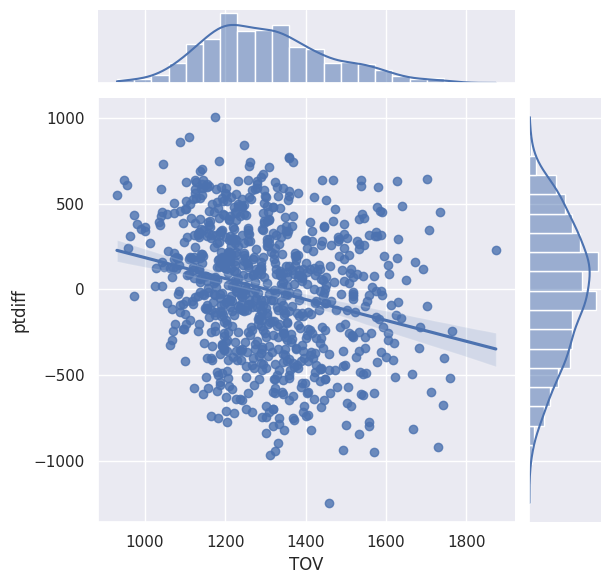

[0.18515068]


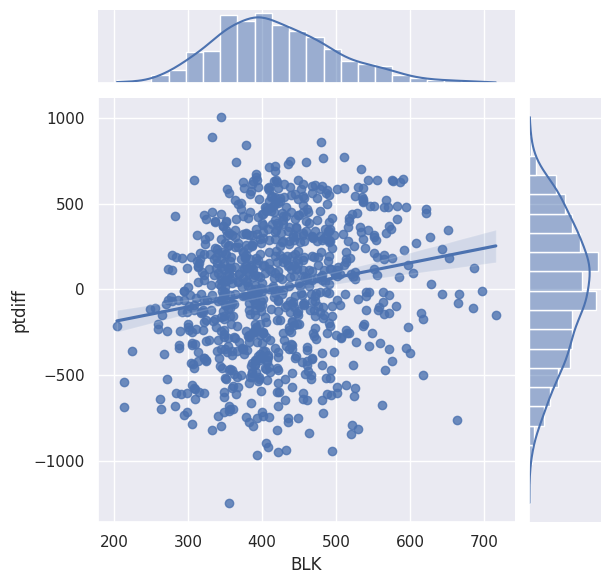

[0.07235925]


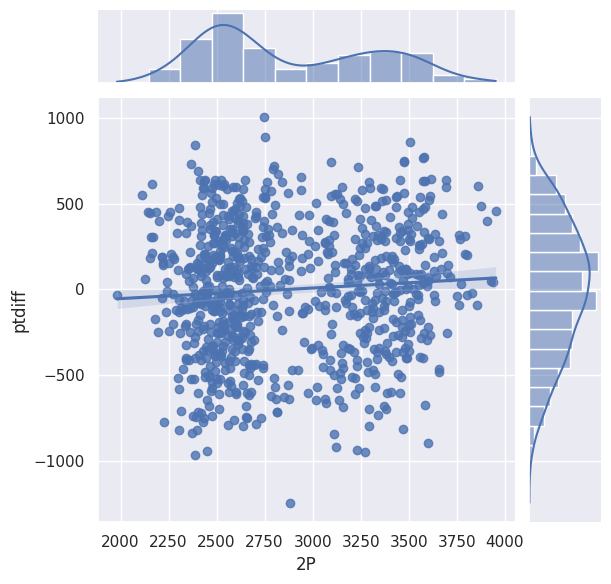

[-0.08672031]


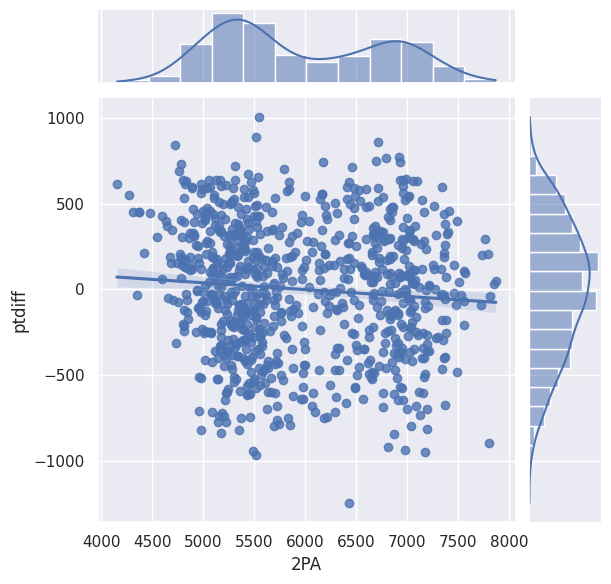

[0.12121548]


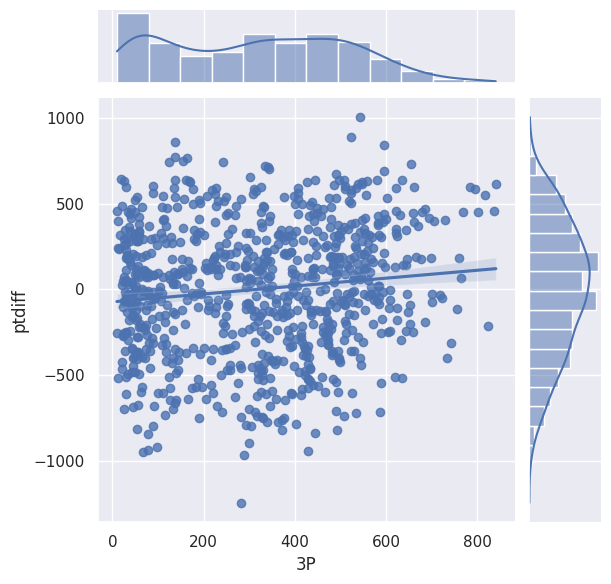

[0.08333602]


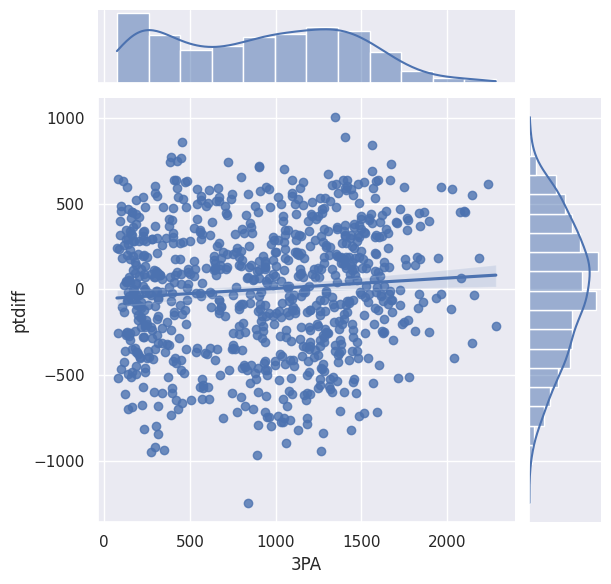

[-0.0935924]


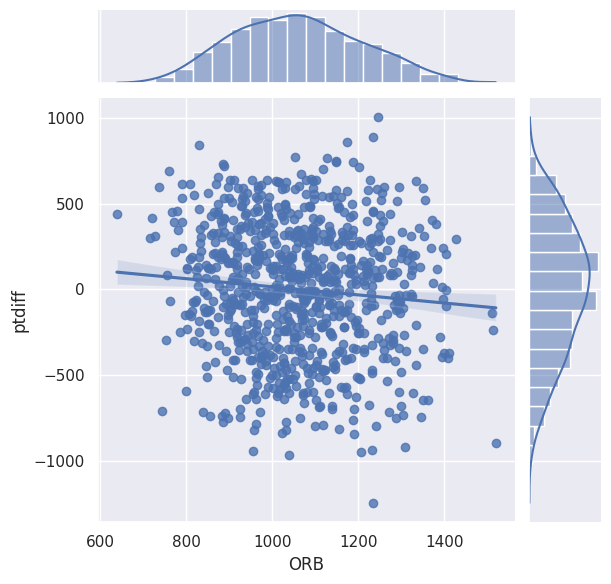

[0.46737378]


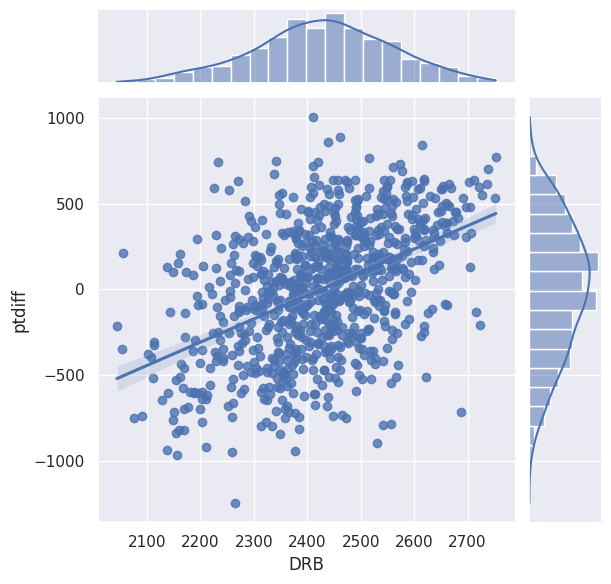

[0.32340381]


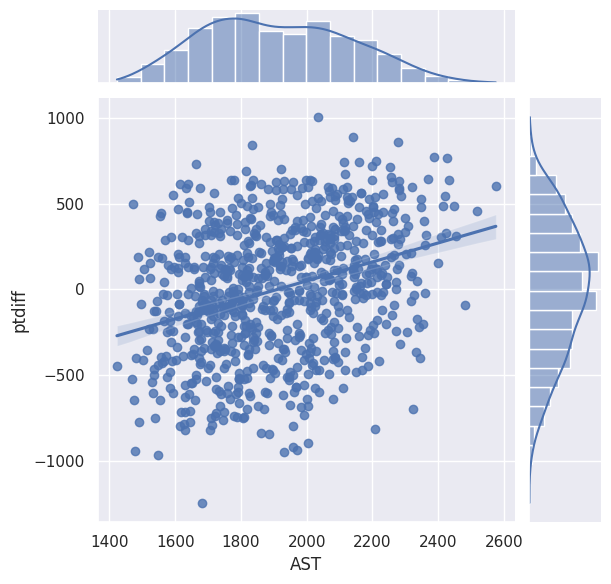

[0.12808131]


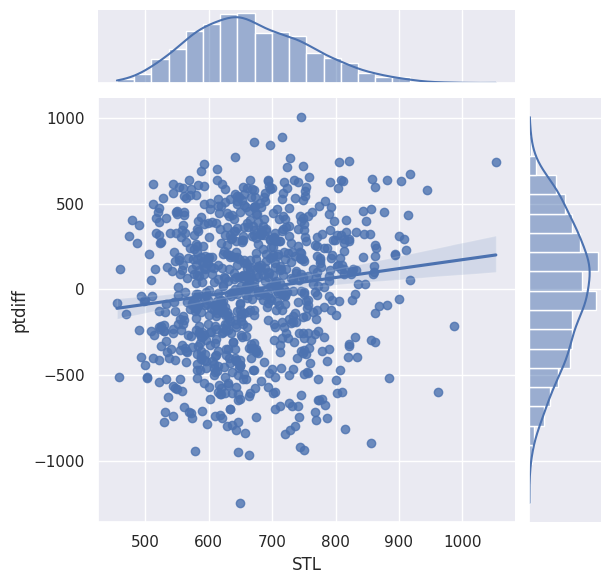

[0.21544512]


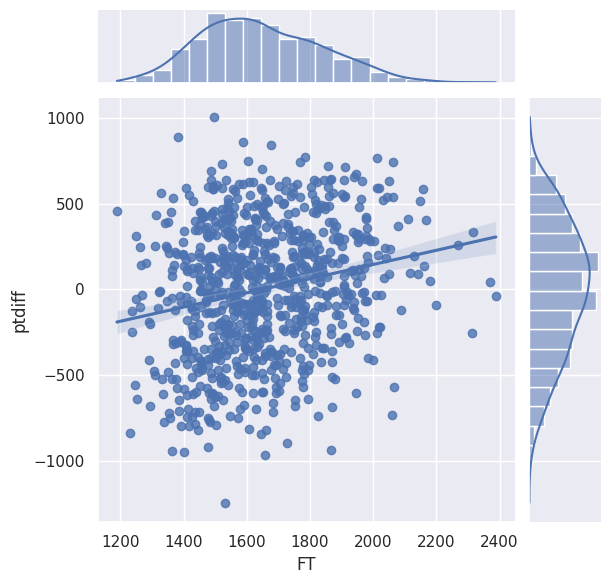

[0.17119872]


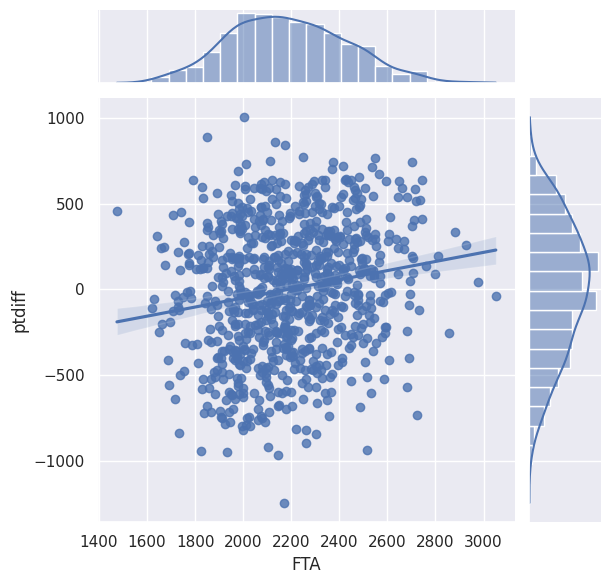

In [178]:
selected_features = ["TOV","BLK","2P","2PA","3P","3PA","ORB","DRB","AST","STL","FT","FTA"]
for feature in selected_features:
    sns.jointplot(NBA_train,x=feature,y="ptdiff",kind="reg")
    print(r_regression(NBA_train[feature].values.reshape(-1,1),NBA_train["ptdiff"].values.ravel()))    
    plt.show()

### It seems like the most important features when it comes to ploting which of the following have the most effect in predicting the points difference is DRB and STL
### Let us create a model that is based off a multiple Linear Regression Model to predict the values 

In [213]:
chosen_features = NBA_train[["DRB","STL","TOV"]]

In [214]:
X = sm.add_constant(chosen_features)
y = NBA_train['ptdiff']

In [215]:
model_test = sm.OLS(y,X).fit()
print(model_test.summary())

                            OLS Regression Results                            
Dep. Variable:                 ptdiff   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     194.6
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           1.47e-95
Time:                        13:46:12   Log-Likelihood:                -5921.2
No. Observations:                 835   AIC:                         1.185e+04
Df Residuals:                     831   BIC:                         1.187e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4066.2214    245.363    -16.572      0.0

### It says that their may be strong multicolinarity from Note[2]. That does not sound good. Oh well. 
### Let us test the model now with the test data

In [229]:
X_test = sm.add_constant(NBA_test[["DRB","STL","TOV"]]) #<--? Was having issues untill I invocked the statmodels.api.add_constant method, don't know why that worked
model_test.predict(X_test)

0     334.996582
1       4.090457
2     -78.827069
3     101.438310
4     -14.100203
5     495.763721
6     509.315277
7     -71.507211
8     466.391064
9     343.832578
10    398.831308
11    375.929522
12    239.292304
13    326.743258
14    342.158091
15    215.767936
16   -193.989229
17    304.339146
18    547.456378
19    124.552914
20    199.437642
21     47.131836
22    -90.031707
23     30.015433
24    614.601865
25     14.986732
26    173.880245
27    284.130168
dtype: float64

### Alright, so these are the predicted points difference that is likely to happen based on the input parameters

In [230]:
model_test.resid.mean()
# The residual mean is close to zero, which means that their is constant variance. Which makes our values more meaningful

-1.080501490010473e-12

array([[<Axes: title={'center': 'const'}>,
        <Axes: title={'center': 'DRB'}>],
       [<Axes: title={'center': 'STL'}>, <Axes: title={'center': 'TOV'}>]],
      dtype=object)

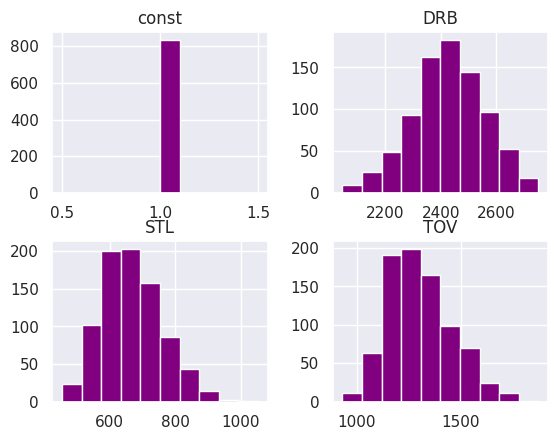

In [234]:
X.hist(color="purple")

### Lets go one layer deeper, we know that the ptsdiff = PTS - oppPTS. What factor(s) determine how much points we get?

In [237]:
NBA_total.columns.values

array(['SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV', 'PTSdiff'], dtype=object)

In [ ]:
# I am assuming the 2P, 3P, BLK, & FG

In [241]:
features_selected = NBA_train[['const','2P','3P','BLK','FG']]
y = NBA_train['PTS']

model_PTS_scored = sm.OLS(y,features_selected).fit()
print(model_PTS_scored.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     3304.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:30:12   Log-Likelihood:                -5430.4
No. Observations:                 835   AIC:                         1.087e+04
Df Residuals:                     831   BIC:                         1.089e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        905.5870     96.946      9.341      0.0

## I also need to make a mode that can predict the amount of points the opposing team will make 

In [277]:
NBA_total.columns

Index(['SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV', 'PTSdiff'],
      dtype='object')

In [281]:
opp_features = sm.add_constant(NBA_train[["FGA","2PA","3PA","TOV"]]).values
y = NBA_train['oppPTS']
model_oppPTS = sm.OLS(y,opp_features).fit()
print(model_oppPTS.summary())

                            OLS Regression Results                            
Dep. Variable:                 oppPTS   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     830.1
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          1.94e-249
Time:                        17:18:17   Log-Likelihood:                -5929.8
No. Observations:                 835   AIC:                         1.187e+04
Df Residuals:                     831   BIC:                         1.189e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -900.1093    262.254     -3.432      0.0

In [285]:
model_oppPTS.predict(sm.add_constant(NBA_test[["FGA","2PA","3PA","TOV"]]))

0     8134.293527
1     7991.247861
2     7999.869453
3     8059.562595
4     8295.179696
5     8284.865449
6     8503.541037
7     8098.758695
8     8338.857911
9     8498.484655
10    8050.100234
11    8159.260150
12    7987.029019
13    7704.764305
14    8641.152480
15    8141.078671
16    7990.868343
17    7961.974198
18    7983.067836
19    8343.841938
20    8176.105731
21    8453.234231
22    8193.757620
23    8370.804066
24    8136.373331
25    8036.639739
26    8134.266325
27    8162.483929
dtype: float64

### Now I will choose a team to make a projection on

In [243]:
NBA_total["Team"].unique()
print(NBA_total.columns)

Index(['SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV', 'PTSdiff'],
      dtype='object')


In [253]:
# I'll do  the team with the lowest total points lost
NBA_total.groupby("Team").PTSdiff.sum().sort_values().head(1)

Team
Los Angeles Clippers   -9758
Name: PTSdiff, dtype: int64

In [273]:
# I will take all of the instances that have the feature of "Los Angeles Clippers" in the Team column
team = NBA_total[NBA_total["Team"] == "Los Angeles Clippers"].copy()

In [274]:
team.sort_values(by="SeasonEnd")

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PTSdiff
125,1985,Los Angeles Clippers,0,31,8784,9152,3527,7119,3471,6931,...,188,1674,2208,1163,2434,1934,534,497,1587,-368
147,1986,Los Angeles Clippers,0,32,8907,9475,3388,7165,3324,6936,...,229,2067,2683,1159,2258,1968,694,501,1506,-568
170,1987,Los Angeles Clippers,0,12,8566,9503,3311,7332,3233,6984,...,348,1866,2515,1231,2137,1971,751,432,1493,-937
193,1988,Los Angeles Clippers,0,17,8103,8949,3190,7194,3111,6877,...,317,1644,2305,1191,2350,1885,721,520,1534,-846
217,1989,Los Angeles Clippers,0,21,8712,9525,3526,7428,3472,7194,...,234,1606,2220,1156,2384,2208,815,530,1666,-813
242,1990,Los Angeles Clippers,0,30,8509,8787,3319,6853,3263,6623,...,230,1815,2458,1056,2362,1978,782,507,1547,-278
269,1991,Los Angeles Clippers,0,31,8491,8774,3391,7315,3278,6881,...,434,1596,2273,1246,2500,2119,725,507,1438,-283
296,1992,Los Angeles Clippers,1,45,8440,8352,3347,7076,3202,6574,...,502,1601,2223,1132,2393,2053,824,498,1269,88
323,1993,Los Angeles Clippers,1,41,8783,8754,3544,7329,3411,6838,...,491,1562,2177,1183,2360,2242,847,491,1338,29
350,1994,Los Angeles Clippers,0,27,8447,8916,3343,7163,3091,6332,...,831,1509,2128,1120,2410,2169,807,421,1474,-469


<Axes: xlabel='SeasonEnd', ylabel='PTSdiff'>

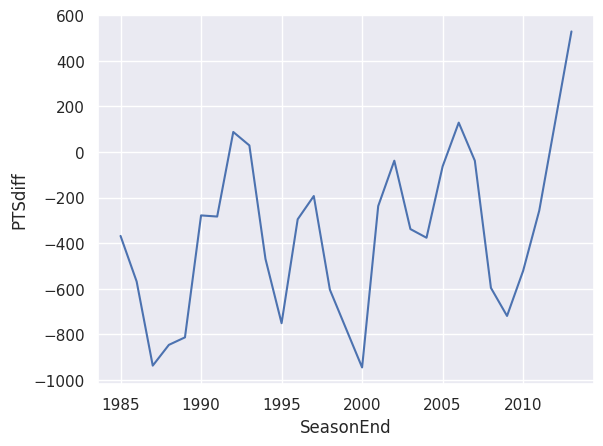

In [275]:
sns.lineplot(team,x="SeasonEnd",y="PTSdiff")

In [289]:
temp = NBA_train[NBA_train["Team"] == "Los Angeles Clippers"].copy()

In [293]:
team = temp[temp["SeasonEnd"] == 2011]
team

,const,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,...,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,ptdiff
816,1.0,2011,Los Angeles Clippers,0,32,8089,8346,3015,6594,2502,...,1519,1546,2187,955,2501,1813,585,402,1343,-257


In [298]:
team.columns

Index(['const', 'SeasonEnd', 'Team', 'Playoffs', 'W', 'PTS', 'oppPTS', 'FG',
       'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST',
       'STL', 'BLK', 'TOV', 'ptdiff'],
      dtype='object')

In [316]:
projected_oppPTS = model_oppPTS.predict(team[["const","FGA","2PA","3PA","TOV"]]).values[0]
projected_oppPTS

8182.6606327889

In [317]:
projected_received = model_test.predict(team[["const","DRB","STL","TOV"]]).values[0]
projected_received

-80.2094285657995

In [318]:
projected_ptdiff = projected_received - projected_oppPTS

In [322]:
model_wins.predict([1,projected_ptdiff])[0]

-228.25663387707908

### It's so wrong, it is funny